In [1]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh

%aimport models.base

import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

%aimport Dataset_QSH

%aimport models.AEFIT4
%aimport models.AEFIT5
%aimport models.Compose

# ipysh.Bootstrap_support.debug()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Hunch models imported
reload set for module  Hunch_utils
reload set for module  Dummy_g1data
reload set for module  Hunch_lsplot
reload set for module  Hunch_tSNEplot


In [2]:
#
# TEST DUMMY
#

In [3]:
import Dummy_g1data as dummy
du = dummy.Dummy_g1data(counts=40000, size=15).buffer()
du.kinds


[{'gain': [1, 1], 'mean': [0.2, 0.8], 'sigma': [0.1, 0.1]},
 {'gain': [0.5], 'mean': [0.8], 'sigma': [0.1]},
 {'gain': [0.5], 'mean': [0.2], 'sigma': [0.1]},
 {'gain': [1], 'mean': [0.5], 'sigma': [0.2]},
 {'gain': [0.5], 'mean': [0.5], 'sigma': [0.2]}]

In [4]:
ds = du.tf_tuple_compose(['x','y','l_mean_sigma~l_mean_gain~l_mean_gain~l_mean_gain~l_mean_gain~l_mean_gain']).map(lambda x,y,t: ((tf.concat([x,y], axis=0),t),(tf.concat([x,y], axis=0),t)) )
[x for x in ds.batch(2).take(1)][0]
# d

W0825 15:06:40.789375 139636988213056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:504: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


((<tf.Tensor: id=56, shape=(2, 30), dtype=float32, numpy=
  array([[0.07558347, 0.20626032, 0.33751637, 0.3730902 , 0.48453468,
          0.49878204, 0.5175363 , 0.5725821 , 0.5751529 , 0.60467464,
          0.65615964, 0.7284977 , 0.75370455, 0.8846998 , 0.9259087 ,
          0.4611768 , 0.99804235, 0.3884934 , 0.22368473, 0.02435944,
          0.02223118, 0.02497717, 0.07629237, 0.08071234, 0.14871414,
          0.35543346, 0.7744299 , 0.898379  , 0.69858193, 0.45264384],
         [0.11635655, 0.14814048, 0.4185214 , 0.44793615, 0.45188752,
          0.46437433, 0.4823113 , 0.53264415, 0.64313495, 0.653127  ,
          0.7197749 , 0.7240315 , 0.7491017 , 0.7791314 , 0.81415564,
          0.07942629, 0.10638282, 0.4601827 , 0.4833423 , 0.48573974,
          0.49213016, 0.49804825, 0.4933839 , 0.38703415, 0.37297428,
          0.2733753 , 0.26699543, 0.23020323, 0.1887982 , 0.14561065]],
        dtype=float32)>, <tf.Tensor: id=57, shape=(2, 6), dtype=float32, numpy=
  array([[0.1, 1. ,

In [42]:
m1 = models.AEFIT5.AEFIT5(latent_dim=6, feature_dim=30,  dprate=0., scale=1, beta=0., name='sxr', geometry=[20,20,10])
m2 = models.AEFIT5.AEFIT5(latent_dim=6, feature_dim=6,  dprate=0., scale=1, beta=0., name='temp', geometry=[])
m2.compile( loss=tf.keras.losses.mean_absolute_error )
hm_feature_dim = m1.latent_dim + m2.latent_dim
hm = models.AEFIT5.AEFIT5(latent_dim=6, feature_dim=hm_feature_dim, beta=0., name='hidden', scale=2, geometry=[20,20,10])


AEFIT5 ready:
AEFIT5 ready:
AEFIT5 ready:


In [43]:
h = models.Compose.Compose().set_model(hm).compose([m1,m2])
h._model.bypass = False
m1.trainable = True
m2.trainable = True
hm.trainable = True
h.compile( )

[(None, 30), (None, 6)]


In [44]:
h.fit(ds.batch(100), epochs=5)

Epoch 1/5
400/400 [==============================] - 30s 76ms/step - loss: 0.6129 - output_1_loss: 0.5579 - output_2_loss: 0.1514
Epoch 2/5
400/400 [==============================] - 21s 53ms/step - loss: 0.5338 - output_1_loss: 0.5143 - output_2_loss: 0.0329
Epoch 3/5
400/400 [==============================] - 21s 54ms/step - loss: 0.5397 - output_1_loss: 0.4957 - output_2_loss: 0.0287
Epoch 4/5
400/400 [==============================] - 21s 53ms/step - loss: 0.5213 - output_1_loss: 0.5030 - output_2_loss: 0.0180
Epoch 5/5
400/400 [==============================] - 21s 53ms/step - loss: 0.5168 - output_1_loss: 0.5009 - output_2_loss: 0.0164


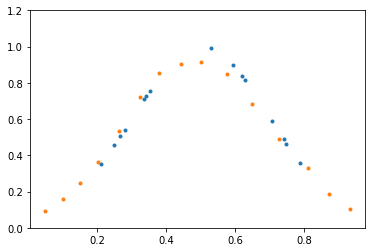

In [36]:
# [ v.name for v in h2.trainable_variables ]
def plot(xy):
    plt.figure('data')
    axes = plt.gca()
    axes.set_ylim([0,1.2])
    ax = plt.get
    x,y = tf.split(xy[0], num_or_size_splits=2)
    plt.plot(x,y,'.')
d = [x for x in ds.shuffle(100).batch(1).take(100)][0]
d0 = d[0][0]
y0 = h(d[0], training=False)
y0 = tf.sigmoid(y0[0][0])
# y0 = y0[0][0]
plot(d0)
plot(y0)

In [9]:
# p = Hplt.LSPlotBokeh()
# p.set_model(h)
# p.set_data(, counts=1000)
# p.plot(notebook_url='http://172.17.0.2:8888')